## Demo branch_device_type

Vicky Hunt, updated 6/13/19

Purpose: demonstrate qualities of new feature, branch_device_type

This notebook (Test_branchdevicetype.ipynb) demonstrates qualitites that differentiate the categories of BranchDeviceType: Transformer, TransformerWinding, and Line. 

1. Transformer and TransformerWinding have mean ratios of approximately 1. The variation around the mean value of 1 is greater for Transformers.
2. Lines have ratio values of 0
3. TransformerWindings show a consistent pattern of having 3 from_bus_id nodes connected to 1 to_bus_id node. This is shown using a network visualization.

In [1]:
#import packages 
import matplotlib
import numpy
from matplotlib import pyplot as plt #using matplotlib
import seaborn as sns
import pandas as pd

#import data from powersim grid
from powersimdata.input.grid import Grid
grid = Grid(['USA'])
grid.branch.head(n=10) #inspect

# Loading USA interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line
--> Done loading


,from_bus_id,to_bus_id,r,x,b,rateA,rateB,rateC,ratio,angle,...,branch_device_type,interconnect,from_lat,from_lon,to_lat,to_lon,from_zone_id,to_zone_id,from_zone_name,to_zone_name
0,1,4,0.001425,0.057222,0.00000,410.72,0,0,1.0,0.0,...,TransformerWinding,Eastern,43.976116,-70.221052,43.976116,-70.221052,1,1,Maine,Maine
1,1,5,0.000224,0.001073,0.00000,0.00,0,0,0.0,0.0,...,Line,Eastern,43.976116,-70.221052,43.976116,-70.221052,1,1,Maine,Maine
2,1,6,0.000204,0.001031,0.00000,0.00,0,0,0.0,0.0,...,Line,Eastern,43.976116,-70.221052,43.976116,-70.221052,1,1,Maine,Maine
3,2,4,-0.000155,-0.006227,0.00000,247.76,0,0,1.0,0.0,...,TransformerWinding,Eastern,43.976116,-70.221052,43.976116,-70.221052,1,1,Maine,Maine
4,170,2,0.006301,0.031408,0.00524,186.85,0,0,0.0,0.0,...,Line,Eastern,43.937578,-70.306163,43.976116,-70.221052,1,1,Maine,Maine
5,3,4,0.006904,0.277296,0.00000,162.96,0,0,1.0,0.0,...,TransformerWinding,Eastern,43.976116,-70.221052,43.976116,-70.221052,1,1,Maine,Maine
6,234,5,0.001700,0.013149,0.02379,531.98,0,0,0.0,0.0,...,Line,Eastern,43.883046,-70.177469,43.976116,-70.221052,1,1,Maine,Maine
7,5,874,0.001581,0.014175,0.06171,600.42,0,0,0.0,0.0,...,Line,Eastern,43.976116,-70.221052,44.110405,-70.187552,1,1,Maine,Maine
8,8,7,0.001150,0.048145,0.00000,233.11,0,0,1.0,0.0,...,Transformer,Eastern,44.100992,-70.305323,44.100992,-70.305323,1,1,Maine,Maine
9,7,9,0.000236,0.001112,0.00000,0.00,0,0,0.0,0.0,...,Line,Eastern,44.100992,-70.305323,44.100992,-70.305323,1,1,Maine,Maine


In [2]:
#lines have ratio 0, Transformers and transformerwindings have ratios around 1, but transformers have higher variance
df = grid.branch
df.groupby(['branch_device_type']).mean()

,from_bus_id,to_bus_id,r,x,b,rateA,rateB,rateC,ratio,angle,...,mu_Sf,mu_St,mu_angmin,mu_angmax,from_lat,from_lon,to_lat,to_lon,from_zone_id,to_zone_id
branch_device_type,,,,,,,,,,,,,,,,,,,,,
Line,351171.157101,351290.894275,0.008322,0.030277,0.03931,213.908925,0.0,0.0,0.000012,0.000000,...,0.0,0.0,0.0,0.0,38.717109,-88.923547,38.716201,-88.923812,55.319452,55.364152
Transformer,533873.182067,533874.081512,0.007332,0.200277,0.00000,433.242686,0.0,0.0,1.011044,-0.005254,...,0.0,0.0,0.0,0.0,38.490838,-91.060053,38.490838,-91.060053,73.013931,73.013931
TransformerWinding,287372.661667,287374.755000,0.004228,0.130265,0.00000,244.800307,0.0,0.0,1.000051,-0.002778,...,0.0,0.0,0.0,0.0,39.692323,-90.053101,39.692323,-90.053101,50.838750,50.838750


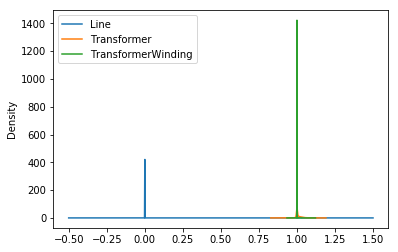

In [3]:
#density plots
df.groupby(['branch_device_type']).ratio.plot.kde()
plt.legend();

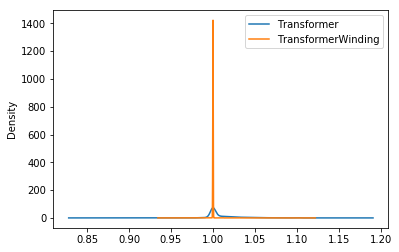

In [4]:
#density plots for transformer vs. transformer winding, showing transformer has greater variation in ratio
dftrans = df.query('branch_device_type != "Line"')
dftrans.groupby(['branch_device_type']).ratio.plot.kde()
plt.legend();

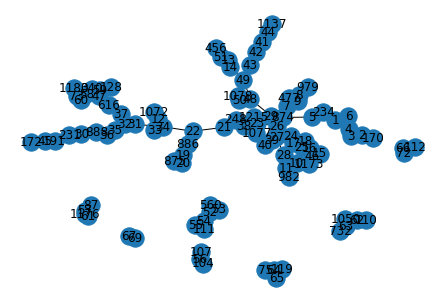

In [5]:
# libraries for network plot
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Build a dataframe with 100 branches
df100 = df.head(100)

#Build your graph
G = nx.from_pandas_edgelist(df100, 'from_bus_id', 'to_bus_id')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [6]:
#make code variable for branchdevicetype, to use for color coding branches in network
df100.branch_device_type = pd.Categorical(df100.branch_device_type)
df100['code'] = df100.branch_device_type.cat.codes
df100.head(5)

c:\program files\python37\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,from_bus_id,to_bus_id,r,x,b,rateA,rateB,rateC,ratio,angle,...,interconnect,from_lat,from_lon,to_lat,to_lon,from_zone_id,to_zone_id,from_zone_name,to_zone_name,code
0,1,4,0.001425,0.057222,0.00000,410.72,0,0,1.0,0.0,...,Eastern,43.976116,-70.221052,43.976116,-70.221052,1,1,Maine,Maine,2
1,1,5,0.000224,0.001073,0.00000,0.00,0,0,0.0,0.0,...,Eastern,43.976116,-70.221052,43.976116,-70.221052,1,1,Maine,Maine,0
2,1,6,0.000204,0.001031,0.00000,0.00,0,0,0.0,0.0,...,Eastern,43.976116,-70.221052,43.976116,-70.221052,1,1,Maine,Maine,0
3,2,4,-0.000155,-0.006227,0.00000,247.76,0,0,1.0,0.0,...,Eastern,43.976116,-70.221052,43.976116,-70.221052,1,1,Maine,Maine,2
4,170,2,0.006301,0.031408,0.00524,186.85,0,0,0.0,0.0,...,Eastern,43.937578,-70.306163,43.976116,-70.221052,1,1,Maine,Maine,0


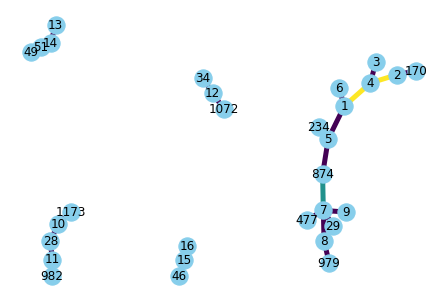

In [7]:
df25 = df100.head(25)
G = nx.from_pandas_edgelist(df25, 'from_bus_id', 'to_bus_id', create_using=nx.Graph())

# Plot it
nx.draw(G, with_labels=True, node_color='skyblue', edge_color=df25['code'], width=5.0)


In [8]:
dftransformer = df.query('branch_device_type == "Transformer"')
dftransformerwinding = df.query('branch_device_type == "TransformerWinding"')
dfline = df.query('branch_device_type == "Line"')

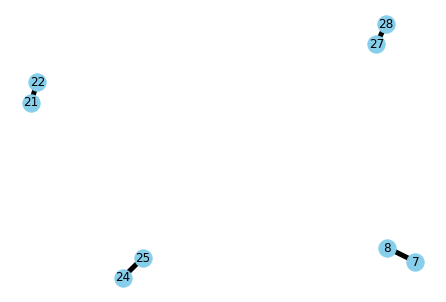

In [9]:
#network, first 4 branches that are transformers
dftransformer4 = dftransformer.head(4)
G = nx.from_pandas_edgelist(dftransformer4, 'from_bus_id', 'to_bus_id', create_using=nx.Graph())

# Plot it
nx.draw(G, with_labels=True, node_color='skyblue', width=5.0)

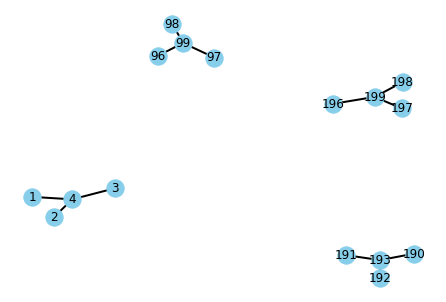

In [10]:
#network, first 12 branches that are transformerwindings
#note that transformer windings always come in 3s, with 3 from bus to one to bus
dftransformerwinding12 = dftransformerwinding.head(12)
G = nx.from_pandas_edgelist(dftransformerwinding12, 'from_bus_id', 'to_bus_id', create_using=nx.Graph())
nx.draw(G, with_labels=True, node_color='skyblue', width=2.0)

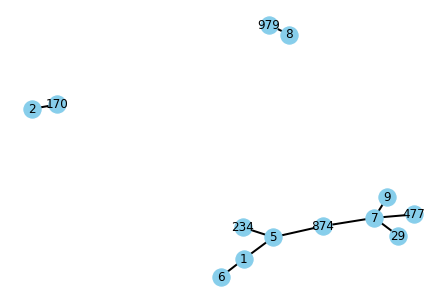

In [11]:
#network, first 10 branches that are lines
dfline10 = dfline.head(10)
G = nx.from_pandas_edgelist(dfline10, 'from_bus_id', 'to_bus_id', create_using=nx.Graph())
nx.draw(G, with_labels=True, node_color='skyblue', width=2.0)